<a href="https://colab.research.google.com/github/nisscamuzcu/UpSchool_DataAnalysis/blob/main/CapstoneProject_NisanurCamuzcu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UpSchool-DA1 - Capstone Project - Updated**
## Nisanur Camuzcu
### Mobile Price Range Classification

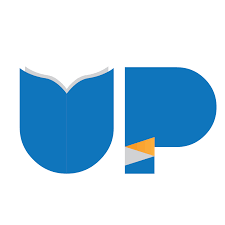

In the capstone project, mobile price range classification is inspected. The price range is divided into four subgroups, from 0 (low price) to 3(very high price). 

General steps of the project are mentioned below. The detailed description is given in the following code cells before the implemented code and also after obtaining the results of the concerned code part.


#### Followed Steps 
First the dataset is loaded and required libraries are imported. Obtaining the data, the worked datasets are examined to grasp knowledge and proceed accordingly to obtain accurate results.

Inspecting the data and features, the existence of missing values are checked. The dataset was ready to work as there is no null or missing variable.

Then with the help of pandas functions, the data is analyzed utilizing the following criteria. 
- describe, mean, min, max, median

Observing and getting familiar with the examined dataset, the results are grouped to reach the dominant and critical features.

In the following parts, the important features are visualized to reach more clear observations. So, the distribution of the features and labels are seen in the plots and figures. Also, the relationship among them is inspected with those plotted figures.

In the last parts of the project, some statistical analysis is handled to check the relation between features with mathematical perspective.

---

#####  ----- Mobile Price Range Classification Project -----

In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


The datasets are loaded from drive. The feature names that can be unclear are arranged in order to work with more clear labels. Then the labels and features are separated in train data. 

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# load train and test data
train = pd.read_csv('/content/gdrive/My Drive/UpSchool/CapstoneProject_NisanurCamuzcu/train.csv')
test_x = pd.read_csv('/content/gdrive/My Drive/UpSchool/CapstoneProject_NisanurCamuzcu/test.csv')

train = train.rename(columns = {'fc':'front_cam', 'pc':'primary_cam', 'sc_h':'screen_heig', 'sc_w':'screen_weig'})
test_x = test_x.rename(columns = {'fc':'front_cam', 'pc':'primary_cam', 'sc_h':'screen_heig', 'sc_w':'screen_weig'})

train_y = train['price_range']
train_x = train.drop('price_range', inplace=False, axis=1)
test_x = test_x.drop('id', inplace=False, axis=1)

In [ ]:
# check the train data
train_x

,battery_power,blue,clock_speed,dual_sim,front_cam,four_g,int_memory,m_dep,mobile_wt,n_cores,primary_cam,px_height,px_width,ram,screen_heig,screen_weig,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [ ]:
# check the test data
test_x

,battery_power,blue,clock_speed,dual_sim,front_cam,four_g,int_memory,m_dep,mobile_wt,n_cores,primary_cam,px_height,px_width,ram,screen_heig,screen_weig,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


The missing values are checked before applying data analysis methods, so more precise deductions and visualizations can be observed.

In [ ]:
# check null elements in the dataset
train.isnull().value_counts()

battery_power  blue   clock_speed  dual_sim  front_cam  four_g  int_memory  m_dep  mobile_wt  n_cores  primary_cam  px_height  px_width  ram    screen_heig  screen_weig  talk_time  three_g  touch_screen  wifi   price_range
False          False  False        False     False      False   False       False  False      False    False        False      False     False  False        False        False      False    False         False  False          2000
dtype: int64

In [ ]:
test_x.isnull().value_counts()

battery_power  blue   clock_speed  dual_sim  front_cam  four_g  int_memory  m_dep  mobile_wt  n_cores  primary_cam  px_height  px_width  ram    screen_heig  screen_weig  talk_time  three_g  touch_screen  wifi 
False          False  False        False     False      False   False       False  False      False    False        False      False     False  False        False        False      False    False         False    1000
dtype: int64

In the chosen datasets, there is no null elements and datasets are ready to work.

---

As next step, the data that dealt with is examined. The descriptive statistical analysis is observed via table from ".describe()" function. With the help of this function any anomaly can be detected by checking the count or min max values etc.

In [ ]:
# analyze the data 
train.describe()

,battery_power,blue,clock_speed,dual_sim,front_cam,four_g,int_memory,m_dep,mobile_wt,n_cores,primary_cam,px_height,px_width,ram,screen_heig,screen_weig,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In the following cell, the data is analysed after classifying the data with respect to its labels. The change in the feature values with respect to varying price range classes is monitored via this table.

In [ ]:
# check the mean of features wrt price_range label
train.groupby('price_range').mean()

,battery_power,blue,clock_speed,dual_sim,front_cam,four_g,int_memory,m_dep,mobile_wt,n_cores,primary_cam,px_height,px_width,ram,screen_heig,screen_weig,talk_time,three_g,touch_screen,wifi
price_range,,,,,,,,,,,,,,,,,,,,
0,1116.902,0.486,1.5502,0.500,4.084,0.518,31.174,0.4902,140.552,4.600,9.574,536.408,1150.270,785.314,12.324,5.682,10.612,0.746,0.524,0.496
1,1228.868,0.490,1.4886,0.510,4.340,0.524,32.116,0.5240,140.510,4.298,9.924,666.892,1251.908,1679.490,12.212,5.544,11.362,0.756,0.522,0.504
2,1228.320,0.486,1.5298,0.498,4.498,0.494,30.920,0.4908,143.614,4.682,10.018,632.284,1234.046,2582.816,12.010,5.714,10.972,0.774,0.470,0.504
3,1379.984,0.518,1.5204,0.530,4.316,0.550,33.976,0.5020,136.320,4.502,10.150,744.848,1369.838,3449.232,12.680,6.128,11.098,0.770,0.496,0.524


From the table above, it is clearly seen that some features like battery power, internal memory, and ram are correlated with the price range. An increase in those features can cause an increase in the price, so do its class.

---

The following cell inspects the min, max, median with respect to each class. A more descriptive table compared to the former one leads more beneficial observations.

In [ ]:
# inspect the distribution of data in terms of min, max, median 
train.groupby('price_range').aggregate(['min', np.median, 'max', np.mean])

battery_power                          ... wifi                  
                      min  median   max      mean  ...  min median max   mean
price_range                                        ...                       
0                     503  1066.0  1994  1116.902  ...    0      0   1  0.496
1                     501  1206.0  1996  1228.868  ...    0      1   1  0.504
2                     501  1219.5  1998  1228.320  ...    0      1   1  0.504
3                     503  1449.5  1994  1379.984  ...    0      1   1  0.524

[4 rows x 80 columns]

The features that can be more crucial in the price range class are examined in the cell below. 

In [ ]:
# observe the distribution of price in pivot table for front_cam and n_cores

train.groupby('price_range').aggregate({'n_cores': 'mean',
                             'front_cam': 'mean', 'four_g': 'mean', 'dual_sim': 'mean'})


,n_cores,front_cam,four_g,dual_sim
price_range,,,,
0,4.600,4.084,0.518,0.500
1,4.298,4.340,0.524,0.510
2,4.682,4.498,0.494,0.498
3,4.502,4.316,0.550,0.530


However, a crucial correlation with the price range could not be detected from the values.

---

The correlation between the features are examined. These correlations are meaningful in PCA. In the following parts of the project PCA can be applied to facilitate machine learning methods with reduced data dimensions.

In [ ]:
init = train['n_cores'].min()
last = train['n_cores'].max()
n_core = pd.cut(train['n_cores'], np.linspace(init-1, last, 5))


init = train['front_cam'].min()
last = train['front_cam'].max()
f_cam = pd.cut(train['front_cam'], np.linspace(init, last+1, 5))

print('\033[1m' + '\t\t\t\tInternal Memory')
train.pivot_table('int_memory', ['price_range', f_cam], n_core)

				Internal Memory


n_cores                   (0.0, 2.0]  (2.0, 4.0]  (4.0, 6.0]  (6.0, 8.0]
price_range front_cam                                                   
0           (0.0, 5.0]     31.314815   32.666667   32.240741   29.918033
            (5.0, 10.0]    30.000000   32.793103   31.117647   30.409091
            (10.0, 15.0]   31.454545   31.375000   28.250000   25.000000
            (15.0, 20.0]   39.500000   35.000000    6.333333   20.333333
1           (0.0, 5.0]     30.730159   33.314815   31.489796   31.882353
            (5.0, 10.0]    31.636364   34.724138   28.523810   29.074074
            (10.0, 15.0]   36.533333   31.235294   39.875000   35.166667
            (15.0, 20.0]   37.000000   40.000000   19.000000   39.333333
2           (0.0, 5.0]     32.239130   34.200000   28.780000   32.791667
            (5.0, 10.0]    33.103448   31.827586   33.545455   27.900000
            (10.0, 15.0]   32.125000   39.000000   20.846154   25.066667
            (15.0, 20.0]   32.333333   17.000000   14.750000   28.500000
3           (0.0, 5.0]     33.451613   37.727273   33.227273   34.116667
            (5.0, 10.0]    29.466667   36.689655   30.294118   33.035714
            (10.0, 15.0]   41.400000   27.000000   30.090909   42.500000
            (15.0, 20.0]   53.500000   12.000000   29.666667   50.000000

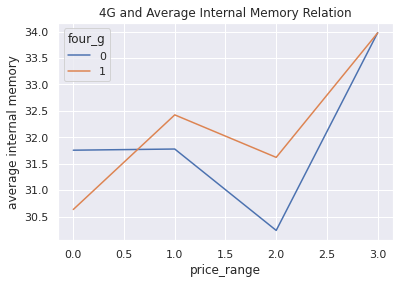

In [ ]:
# use Seaborn styles
sns.set()
train.pivot_table('int_memory', index='price_range', columns='four_g',
                    aggfunc='mean', fill_value=0, dropna=True,).plot()
plt.ylabel('average internal memory');
plt.title('4G and Average Internal Memory Relation');

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/pyt

<Figure size 360x216 with 0 Axes>

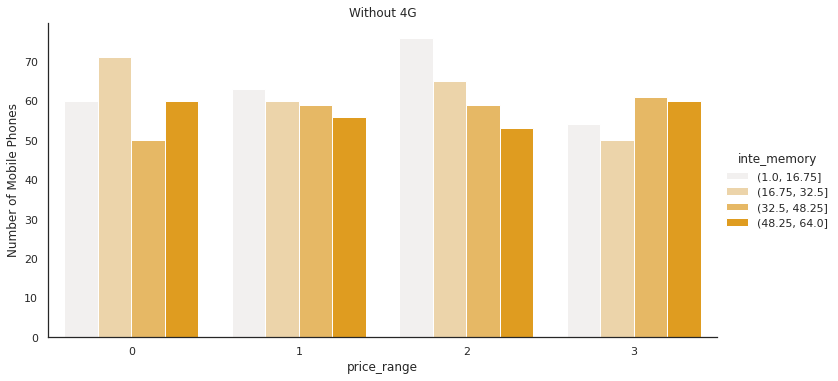

<Figure size 540x288 with 0 Axes>

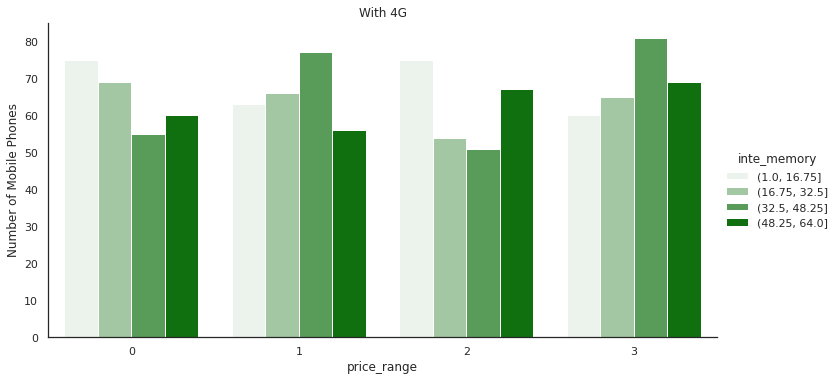

In [ ]:
init = train['int_memory'].min()
last = train['int_memory'].max()
train['inte_memory'] = pd.cut(train['int_memory'], np.linspace(init-1, last, 5))

no_4g = train[(train['four_g']==0)]
ye_4g = train[(train['four_g']==1)]


with sns.axes_style('white'):
    plt.figure(figsize=(5,3))
    g = sns.factorplot("price_range", data=no_4g, aspect=2,
                       kind="count", hue='inte_memory', color='orange')
    g.set_ylabels('Number of Mobile Phones')
    plt.title('Without 4G')


    plt.figure(figsize=(7.5,4))
    f = sns.factorplot("price_range", data=ye_4g, aspect=2,
                       kind="count", hue='inte_memory',  color='green')
    f.set_ylabels('Number of Mobile Phones')
    plt.title('With 4G')

Observing the numerical and visual results, a meaningful correlation could not be reached. As mentioned above PCA could be more beneficial to handle this issue.

---

In this part the dataset is analysed to see whether the dealt dataset is balanced or not.

In [ ]:
train['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

As all classes has same number of instances, the dataset is perfectly balanced. Also it is observed from the following figure.

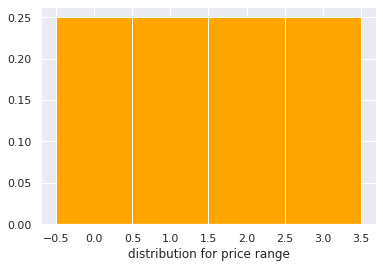

In [ ]:
# visualize the distribution
%matplotlib inline

# the dataset is balanced
plt.hist(train['price_range'], bins=4, range=[-0.5, 3.5], density=True, color='orange', align='mid', stacked=False)
plt.xlabel('distribution for price range')
plt.show()

The distribution of features are observed via plotted factor plots. It is observed that the class labels have no crucial impact on the distribution for the inspected features.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/pyt

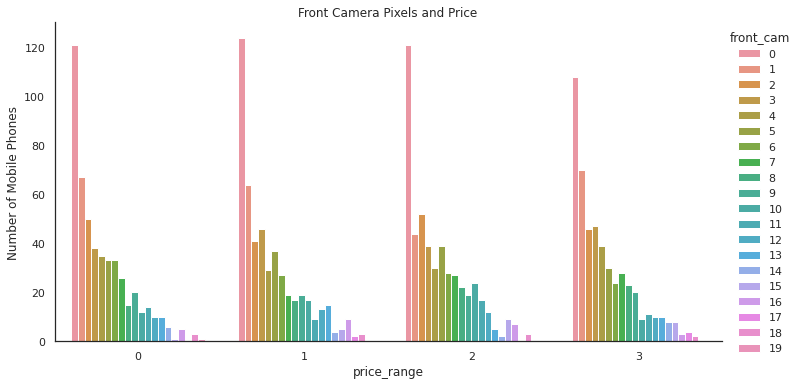

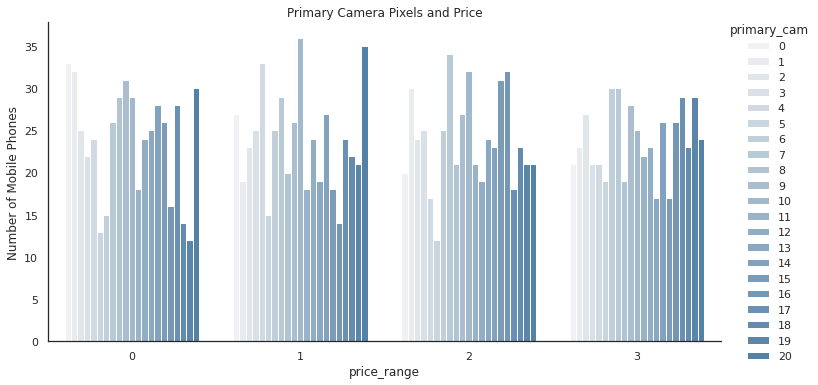

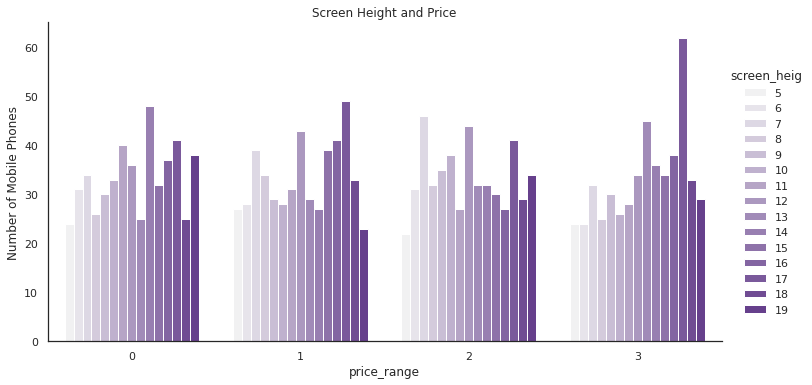

In [ ]:
with sns.axes_style('white'):
    g = sns.factorplot("price_range", data=train, aspect=2,
                       kind="count", hue='front_cam')
    g.set_ylabels('Number of Mobile Phones')
    plt.title('Front Camera Pixels and Price')

    
    g = sns.factorplot("price_range", data=train, aspect=2,
                       kind="count", hue='primary_cam', color='steelblue')
    g.set_ylabels('Number of Mobile Phones')
    plt.title('Primary Camera Pixels and Price')


    g = sns.factorplot("price_range", data=train, aspect=2,
                       kind="count", hue='screen_heig', color='rebeccapurple')
    g.set_ylabels('Number of Mobile Phones')
    plt.title('Screen Height and Price')


The train data is separated with respect to its labels in order to utilize in the following parts.

In [ ]:
# data is separated with respect to the price_range column 
cheap = train[(train['price_range']==0)]
medium = train[(train['price_range']==1)]
high = train[(train['price_range']==2)]
very_high = train[(train['price_range']==3)]

In order to observe the impacts of the features together, 3 features and labels are inspected on the same figure. X axis refers to RAM, Y axis refers to battery power, varying color reflects the change in internal memory and size presents the price range.

Text(0, 0.5, 'Battery Power')

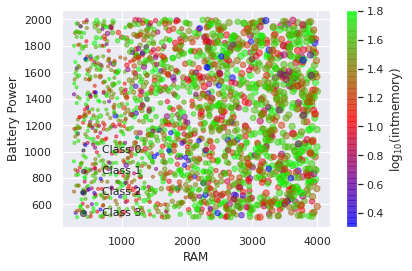

In [ ]:
# scatter plot that examines ram, memory, battery and price
plt.scatter(train_x['ram'], train_x['battery_power'],
          c=np.log10(train_x['int_memory']), s=10*(train['price_range']+1),
          cmap='brg', alpha=0.5)

# create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm int memory})$')
# plt.clim(3, 7)

# make legend with dummy points
for a in [0, 1, 2, 3]:
    plt.scatter([], [], c='k', alpha=0.5, s=10*(a+1),
                label="Class " + str(a))
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');
plt.xlabel('RAM')
plt.ylabel('Battery Power')

From the figure above it is monitored that the RAM has the most impact on the class labels.

The impact of selected features on class label is examined via plotted figures.

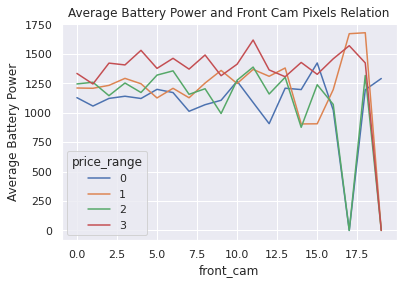

In [ ]:
train.pivot_table('battery_power', index='front_cam', columns='price_range',
                    aggfunc='mean', fill_value=0, dropna=True,).plot()
plt.ylabel('Average Battery Power');
plt.title('Average Battery Power and Front Cam Pixels Relation');

Concerning the initial parts of the figure, battery power is more dominant in stating the class labels.

---

Other fatures are examined too, in order to see the change in the impact.

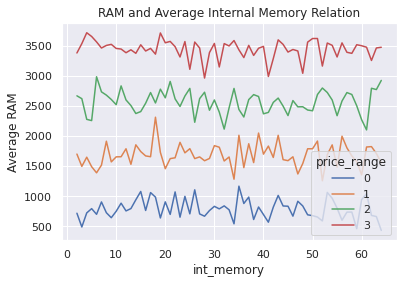

In [ ]:
train.pivot_table('ram', index='int_memory', columns='price_range',
                    aggfunc='mean', fill_value=0, dropna=True,).plot()
plt.ylabel('Average RAM');
plt.title('RAM and Average Internal Memory Relation');

As it stated in the previous parts of the project RAM is clearly related with the class labels.

---
 
Some statistical analysis is applied to train data. Before obtaining numerical results from statistical tests, some visualizations for different classes are utilized to see the relations. Then Levene's test, T test and ANOVA are applied to obtain more precise results.

Text(0.5, 1.0, 'Low Price Internal Memory Q-Q plot')

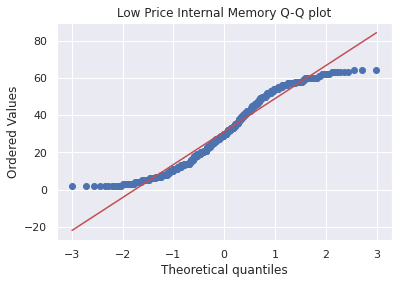

In [ ]:
# statistical analysis
stats.probplot(cheap['int_memory'], dist='norm', plot=plt)
plt.title('Low Price Internal Memory Q-Q plot')

Text(0.5, 1.0, 'High Price Internal Memory Q-Q plot')

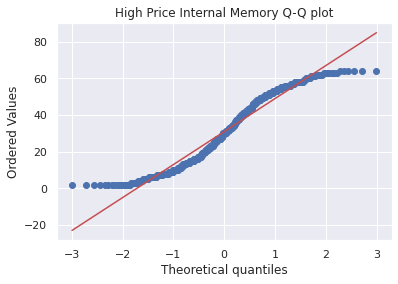

In [ ]:
stats.probplot(high['int_memory'], dist='norm', plot=plt)
plt.title('High Price Internal Memory Q-Q plot')

In [ ]:
# data is analysed before handling t-test
print(stats.levene(cheap['int_memory'], high['int_memory']))


LeveneResult(statistic=0.8470159383112685, pvalue=0.3576202880586222)


In [ ]:
# t test is applied to compare the means
print(stats.ttest_ind(cheap['int_memory'], high['int_memory']))

Ttest_indResult(statistic=0.21979147840228733, pvalue=0.82607850384982)


Text(0.5, 1.0, 'Low Price Ram Q-Q plot')

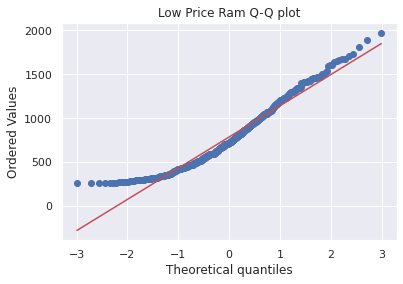

In [ ]:
stats.probplot(cheap['ram'], dist='norm', plot=plt)
plt.title('Low Price Ram Q-Q plot')

Text(0.5, 1.0, 'High Price Internal Memory Q-Q plot')

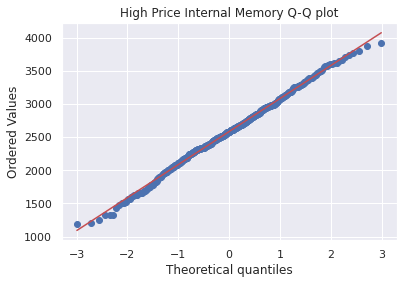

In [ ]:
stats.probplot(high['ram'], dist='norm', plot=plt)
plt.title('High Price Internal Memory Q-Q plot')

In [ ]:
# data is analysed before handling t-test
print(stats.levene(cheap['ram'], high['ram']))

LeveneResult(statistic=31.16760119715042, pvalue=3.049939833686545e-08)


In [ ]:
# t test is applied to compare the means
print(stats.ttest_ind(cheap['ram'], high['ram']))

Ttest_indResult(statistic=-65.39029735548071, pvalue=0.0)


The p value is zero for RAM, as it is expected from the former parts of the project.

---

In [ ]:
# variances are examined via anova table
model = ols('int_memory ~ C(price_range)', data=train).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(price_range),2879.0295,3.0,2.922996,0.032777
Residual,655325.6460,1996.0,NaN,NaN


In [ ]:
# variances are examined via anova table
model = ols('battery_power ~ C(price_range)', data=train).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(price_range),1.750010e+07,3.0,31.598158,5.948688e-20
Residual,3.684835e+08,1996.0,NaN,NaN


In [ ]:
# variances are examined via anova table
model = ols('ram ~ C(price_range)', data=train).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(price_range),1.978211e+09,3.0,3520.110824,0.0
Residual,3.739000e+08,1996.0,NaN,NaN


Comparing the obtained results RAM is most dominant feature in the classification. Then battery power and internal memory are some crucial fetures on the labels.

#### Conclusion
 
At the end of the implemented codes and obtained results, it can be deduced that there are some features that not linearly correlated with the classification results (such as 4G, # of cores, bluetooth, etc.) However, from the figures and statistical analysis results it can be clearly seen that RAM, battery power, front camera pixels etc. are clearly related with the class labels. Among those featuresnRAM has the most impact on the labels.

 #### Highlights for Machine Learning
 
Concerning the observations and deductions, the dimension reduction or feature selection might be utilized to proceed more efficiently in the machine learning parts if needed. In addition to those points, the test and training data is separated in the downloaded file. However, in order to reach more accurate results, validation set should be  separated too. Applying the validation process, hyperparameters will be tuned if needed for the chosen machine learning algorithms.